# Data Import, Cleaning and Formatting

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [213]:
%matplotlib inline

In [214]:
data_url = 'https://raw.githubusercontent.com/kcm117/bikedata/master/MOOC_Daten_Energiefahrrad.csv'
df = pd.read_csv(data_url,
                 delimiter=';',
                 converters={'PeakPower[0]': lambda x: float(x.replace('.','').replace(',','.')),
                               'Energy[0]': lambda x: float(x.replace('.','').replace(',','.'))})

In [215]:
# Peek at initial data load characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207557 entries, 0 to 207556
Data columns (total 7 columns):
Session ID            207557 non-null int64
Session Start Time    207557 non-null object
User ID               207557 non-null int64
Sex                   207548 non-null object
Age                   207557 non-null int64
PeakPower[0]          207557 non-null float64
Energy[0]             207557 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ MB


The bike dataset has 207,557 records.

In [216]:
# rename columns
df = df.rename(columns={'PeakPower[0]':'PeakPowerWatts','Energy[0]':'EnergykWh'})

In [217]:
# Transform string to date, specify European format
df['Session Start Time'] = pd.to_datetime(df['Session Start Time'],dayfirst=True)

In [218]:
df.head(5)

,Session ID,Session Start Time,User ID,Sex,Age,PeakPowerWatts,EnergykWh
0,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194
1,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204
2,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237
3,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243
4,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288


In [219]:
# Set the Year and month to the index
df['DateIndex'] = df["Session Start Time"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["DateIndex"],inplace=True)

In [220]:
# Set Session Id and Session Start Time to strings
df['User ID'] = df['User ID'].astype(str)
df['Session ID'] = df['Session ID'].astype(str)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207557 entries, 2010-01-01 to 2016-12-30
Data columns (total 8 columns):
Session ID            207557 non-null object
Session Start Time    207557 non-null datetime64[ns]
User ID               207557 non-null object
Sex                   207548 non-null object
Age                   207557 non-null int64
PeakPowerWatts        207557 non-null float64
EnergykWh             207557 non-null float64
DateIndex             207557 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [222]:
df.head(5)

,Session ID,Session Start Time,User ID,Sex,Age,PeakPowerWatts,EnergykWh,DateIndex
DateIndex,,,,,,,,
2010-01-01,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194,2010-01-01
2010-01-01,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204,2010-01-01
2010-01-01,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237,2010-01-01
2010-01-01,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243,2010-01-01
2010-01-01,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288,2010-01-01


Data Cleanup:

1) Remove Ages < 5.

2) Remove Peak Power and Energy outliers outside 3 standard deviations.

3) Remove rows with null values.

In [223]:
# Remove Rows with Null Sex
df = df[pd.notnull(df['Sex'])]

In [224]:
# Remove children under 5 years of age
df = df[df['Age'] >= 5]

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205781 entries, 2010-01-01 to 2016-12-30
Data columns (total 8 columns):
Session ID            205781 non-null object
Session Start Time    205781 non-null datetime64[ns]
User ID               205781 non-null object
Sex                   205781 non-null object
Age                   205781 non-null int64
PeakPowerWatts        205781 non-null float64
EnergykWh             205781 non-null float64
DateIndex             205781 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.1+ MB


In [226]:
# Remove outlier values for peak power and energy.  Defined as < or > +/- 3 Standard Deviations
df = df[np.abs(df.PeakPowerWatts-df.PeakPowerWatts.mean())<=(3*df.PeakPowerWatts.std())]
df = df[np.abs(df.EnergykWh-df.EnergykWh.mean())<=(3*df.EnergykWh.std())]

In [228]:
df.count()

Session ID            204847
Session Start Time    204847
User ID               204847
Sex                   204847
Age                   204847
PeakPowerWatts        204847
EnergykWh             204847
DateIndex             204847
dtype: int64

# Data Summarization and Analysis

In the results below, we can view the sum, mean and median of the continuous features by year and month

In [229]:
# Group by year
df.groupby(df.DateIndex.dt.year).agg(['sum', 'mean', 'median'])

Age                   PeakPowerWatts                       \
              sum       mean median            sum        mean   median   
DateIndex                                                                 
2010       667277  20.488731     13   1.283522e+07  394.105400  368.460   
2011       640233  21.392442     13   1.173160e+07  391.994159  364.560   
2012       592576  21.640288     13   1.324893e+07  483.837618  460.580   
2013       710999  21.867472     13   1.495988e+07  460.105902  435.225   
2014       612213  21.567428     12   1.228964e+07  432.947108  398.320   
2015       549248  21.455838     12   9.786688e+06  382.307439  345.600   
2016       610291  21.437037     12   1.116642e+07  392.230840  358.400   

          EnergykWh                     
                sum      mean   median  
DateIndex                               
2010       72.09037  0.002214  0.00212  
2011       67.00448  0.002239  0.00211  
2012       76.05665  0.002778  0.00260  
2013       86.59393  0.002663  0.00247  
2014       70.80951  0.002495  0.00228  
2015       55.80870  0.002180  0.00198  
2016       63.36048  0.002226  0.00201

In [230]:
# Group by Age
df.groupby('Age')['PeakPowerWatts','EnergykWh'].describe()

PeakPowerWatts                                                     \
             count        mean         std     min       25%      50%   
Age                                                                     
5           1750.0  214.252486  147.416942    5.38  123.0750  168.470   
6           4336.0  223.128210  113.053791    8.32  159.0700  200.720   
7           7256.0  248.729099   98.084409    3.11  191.0600  232.650   
8          10880.0  279.192778   92.082737    2.59  225.7400  270.270   
9          15801.0  314.728029   94.457785   16.64  253.9300  305.270   
10         24412.0  347.325037  104.399695    2.33  284.5900  333.660   
11         19985.0  384.116540  109.364165    6.63  312.5400  367.660   
12         18411.0  423.110850  123.787903   15.88  336.9500  400.000   
13         14348.0  464.210849  139.036532    7.25  364.5600  446.860   
14         10128.0  500.276447  155.079556   17.77  382.2250  483.930   
15          5988.0  530.923515  168.453130   18.70  398.3200  517.300   
16          3355.0  535.920841  175.243354    5.74  400.0000  520.850   
17          2259.0  534.004936  182.383904    7.99  396.3000  517.090   
18          1629.0  524.636845  177.574246    5.36  389.8100  509.680   
19          1426.0  518.177833  183.452194   36.78  375.0400  498.480   
20          1595.0  498.994464  186.667781   11.76  354.5850  489.600   
21          1090.0  523.908917  172.942920   48.14  393.4525  502.400   
22          1021.0  519.676778  178.325104   39.42  373.7100  507.860   
23           955.0  538.096618  173.375036    1.15  410.2000  518.640   
24           988.0  538.748512  173.991609   20.70  402.2275  523.080   
25          1010.0  555.070901  173.544129   79.12  420.0500  559.840   
26           967.0  547.212616  170.269595   65.88  418.3050  538.640   
27          1003.0  548.889153  174.116185   90.00  420.0500  546.430   
28           935.0  537.358032  173.076651   11.56  401.5850  527.590   
29           938.0  535.612249  162.004335  130.53  412.4700  519.860   
30          1322.0  512.111528  179.529364    5.87  374.4925  506.050   
31           919.0  534.810316  172.919023   18.82  394.7800  522.450   
32           964.0  531.768019  173.351629   70.01  395.8975  520.355   
33          1145.0  527.457694  170.983633   31.67  394.5200  517.300   
34          1125.0  527.734791  175.496091   10.28  387.4400  509.680   
..             ...         ...         ...     ...       ...      ...   
70          1054.0  295.161357  138.475497   26.41  207.2700  258.110   
71           122.0  366.574508  127.064304  112.32  289.1775  349.670   
72           133.0  395.023609  144.387401   85.97  280.7300  386.410   
73           121.0  374.953058  128.721035  121.93  291.8900  367.660   
74           106.0  376.916038  138.628999   64.29  275.8675  365.555   
75            83.0  371.245663  135.290559  108.26  278.2650  356.390   
76            64.0  369.618594  136.355763  134.58  275.8875  368.185   
77            62.0  310.032742  147.528921  101.79  204.9625  258.080   
78            43.0  322.036744  167.076171  103.17  200.6100  294.150   
79            35.0  346.149143  149.819018  142.50  229.9200  313.910   
80          1449.0  294.404403  111.770132   19.55  228.7600  276.120   
81            28.0  326.139643  148.014712   76.08  234.5250  329.155   
82            22.0  384.018182  202.578935   81.51  250.0900  306.925   
83            15.0  419.220667  205.248966  177.66  282.3050  340.300   
84            16.0  353.195000  177.684301  176.29  250.7525  287.290   
85            21.0  405.420476  198.147743  153.58  260.2400  364.620   
86             9.0  322.005556   84.466161  196.36  242.5500  340.300   
87            19.0  354.415789  175.621252  121.06  219.2750  330.430   
88            51.0  349.262549  168.220098   73.31  240.7600  301.480   
89            44.0  367.312045  154.717038  142.20  258.4125  332.940   
90          2400.0  345.159829  130.910114    8.37  266.2550  

In [305]:
# Total Energy in kWh by Year
df.groupby([df.DateIndex.dt.year])['EnergykWh'].agg(['sum'])

,sum
DateIndex,
2010,72.09037
2011,67.00448
2012,76.05665
2013,86.59393
2014,70.80951
2015,55.80870
2016,63.36048


In [231]:
# Group by Sex
df.groupby('Sex')['PeakPowerWatts','EnergykWh'].describe()

PeakPowerWatts                                                        \
             count        mean         std   min     25%     50%     75%   
Sex                                                                        
f          93334.0  371.336607  131.370152  1.15  281.38  352.74  450.70   
m         111513.0  460.574536  184.783876  2.33  315.21  432.22  607.69   

             EnergykWh                                                 \
         max     count      mean       std      min      25%      50%   
Sex                                                                     
f    1236.52   93334.0  0.002180  0.000849  0.00001  0.00163  0.00211   
m    1236.52  111513.0  0.002585  0.001207  0.00001  0.00172  0.00233   

                       
         75%      max  
Sex                    
f    0.00268  0.00565  
m    0.00341  0.00569

In [343]:
# Total Annual Energy, by Sex
df_year_sex_energy = df.groupby([df.DateIndex.dt.year,'Sex'])['EnergykWh']\
.agg(['sum'])\
.rename(columns={'sum':'Total Energy (kWh)'})

df_year_sex_energy

Total Energy (kWh)
DateIndex Sex                    
2010      f              28.78390
          m              43.30647
2011      f              28.05100
          m              38.95348
2012      f              32.51936
          m              43.53729
2013      f              36.14641
          m              50.44752
2014      f              29.04877
          m              41.76074
2015      f              23.28073
          m              32.52797
2016      f              25.68118
          m              37.67930

# Charts and Visuals

In [276]:
import seaborn as sns
import calendar

In [289]:
# Create a separate data frame for visuals
df_time = df.copy()
df_time['Year'] = df.DateIndex.dt.year
df_time['Month'] = df.DateIndex.dt.month

In [290]:
df_time.reset_index(drop = True, inplace = True)

In [291]:
df_time.head()

,Session ID,Session Start Time,User ID,Sex,Age,PeakPowerWatts,EnergykWh,DateIndex,Year,Month
0,89677,2010-01-01 10:14:00,17696,m,14,324.81,0.00194,2010-01-01,2010,1
1,89678,2010-01-01 10:16:00,17697,f,14,291.89,0.00204,2010-01-01,2010,1
2,89679,2010-01-01 10:18:00,17698,f,46,321.14,0.00237,2010-01-01,2010,1
3,89685,2010-01-01 10:27:00,17701,f,38,396.33,0.00243,2010-01-01,2010,1
4,89688,2010-01-01 10:30:00,17703,m,46,375.04,0.00288,2010-01-01,2010,1


In [284]:
sns.set_context("poster")

Text(0.5,1,'Male and Female Peak Power by Year')

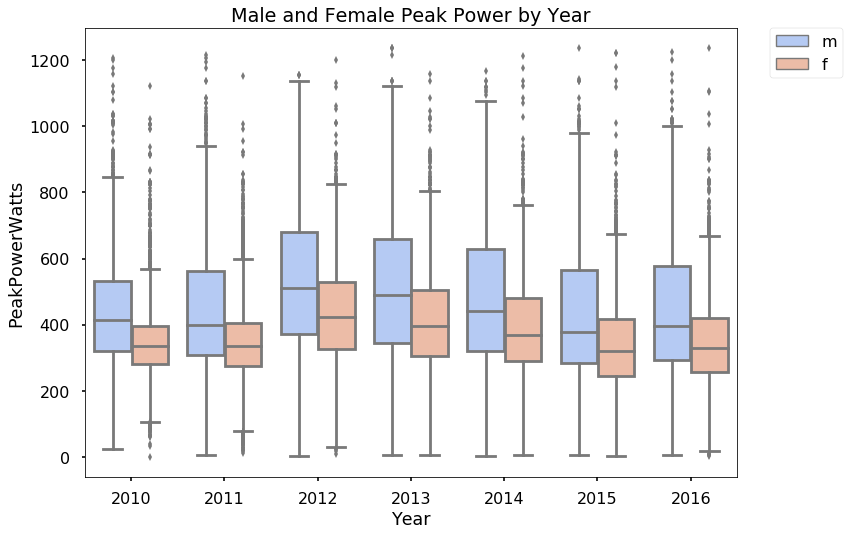

In [285]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.boxplot(x='Year',
            y='PeakPowerWatts',
            hue='Sex',
            data=df_time,
            palette="coolwarm")

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Male and Female Peak Power by Year')

Text(0.5,1,'Male and Female Energy by Year')

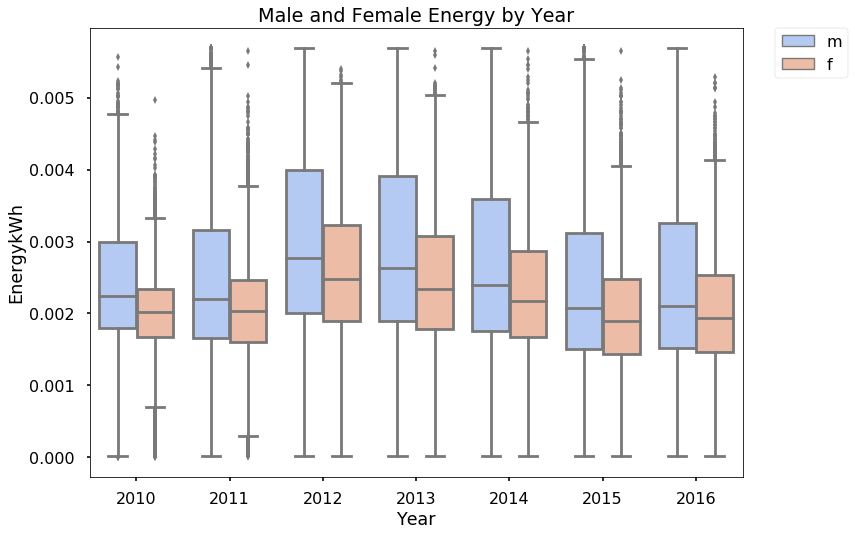

In [236]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.boxplot(x='Year',
            y='EnergykWh',
            hue='Sex',
            data=df_time,
            palette="coolwarm")

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Male and Female Energy by Year')

No handles with labels found to put in legend.


Text(0.5,1,'Age Distribution')

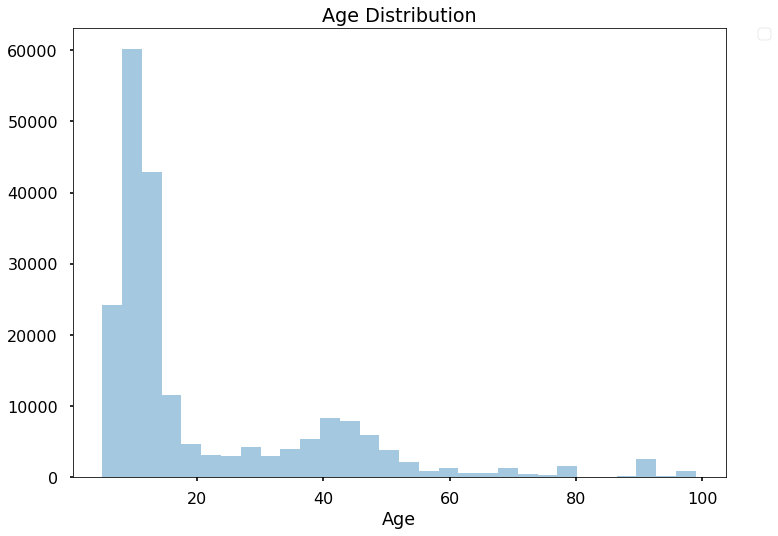

In [245]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.distplot(df_time['Age'], kde=False, bins=30)

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Age Distribution')

In [288]:
df_time.pivot_table(values='PeakPowerWatts',index='Month',columns='Year')

Year,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,
April,391.191367,374.928657,371.846626,449.873233,436.541689,371.179921,390.190433
August,392.969779,386.392718,491.037034,461.604720,429.339715,351.954282,389.608311
December,402.210675,517.079030,487.254510,462.279432,418.437496,389.661821,402.635354
February,387.278519,378.934040,492.563752,454.337907,448.218391,408.168727,389.646170
January,397.110870,390.017380,497.311809,481.801916,461.649201,426.795031,396.658781
July,401.515680,393.298750,496.202296,462.190234,438.580640,364.437384,391.106595
June,392.211494,383.480514,492.672438,451.014550,425.185159,354.489087,382.880347
March,396.622669,368.172943,492.285408,461.700309,426.894767,409.544189,390.580072
May,395.944497,387.524915,515.152258,448.235392,429.919672,354.867414,387.117895


No handles with labels found to put in legend.


Text(0.5,1,'Peak Power By Month and Year')

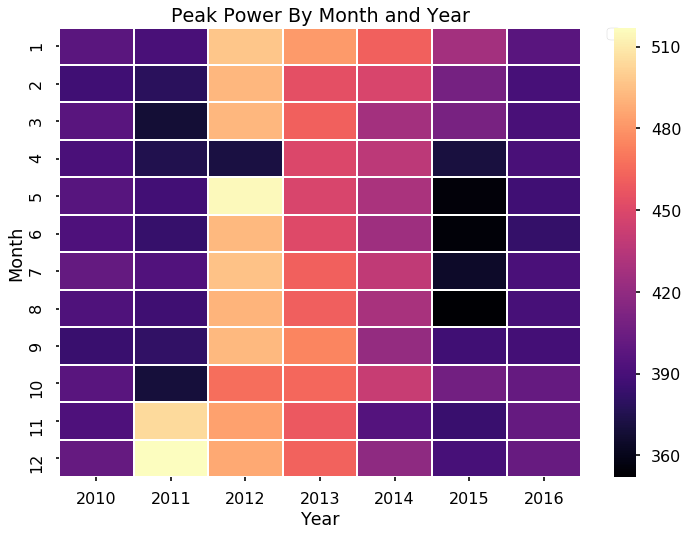

In [292]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.heatmap(df_time.pivot_table(values='PeakPowerWatts',index='Month',columns='Year'),
            cmap="magma",
            linecolor='white',
            linewidths=1)

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Peak Power By Month and Year')

In [298]:
# Create data
df.groupby([df.DateIndex.dt.year])['EnergykWh'].agg(['sum'])

In [303]:
df_totalenergy_year

,sum
DateIndex,
2010,72.09037
2011,67.00448
2012,76.05665
2013,86.59393
2014,70.80951
2015,55.80870
2016,63.36048


Text(0.5,1,'Total Energy by Year and Sex')

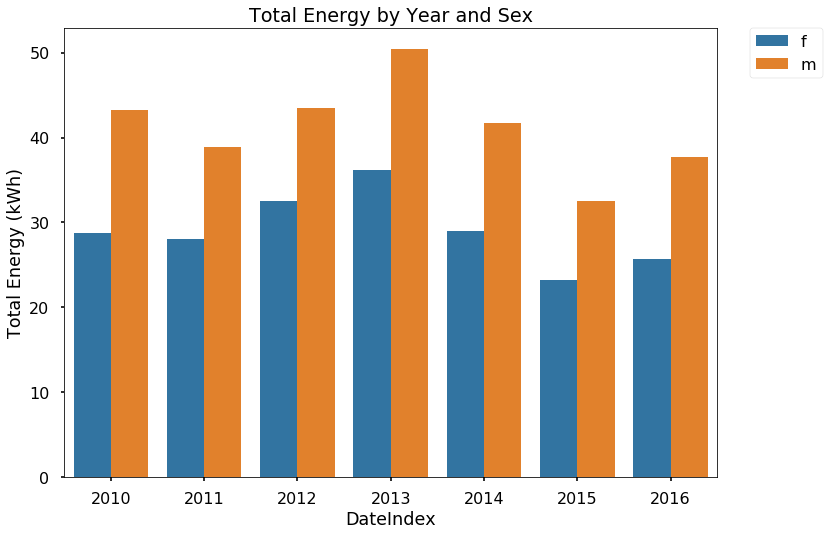

In [344]:
# Make figure large
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)

# Plot
sns.barplot(x='DateIndex',y='Total Energy (kWh)',hue='Sex',data=df_year_sex_energy.reset_index())

# Legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Total Energy by Year and Sex')

In [ ]:
# TODO - Writeup of findings